In [52]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 
import scipy
from scipy.stats import binom

sns.set_theme()

In [5]:
#we import os and sys so as to access script modules we created in the script folders

import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

In [6]:
from loaddata import ReadData

In [7]:

#using one of our pre-written scrits we import and load our datasets
dataRead=ReadData(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\a_b_testing\data\AdSmartABdata.csv')
data=dataRead.readCsv()

Reading Data...

Successfully read the dataset ...


In [8]:
data.head(100)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
95,030f8197-4daa-4584-a43a-a5805d6947e4,exposed,2020-07-08,20,Generic Smartphone,6,Chrome Mobile,0,1
96,0315f5f3-d286-4d23-abbc-1c7b8401991f,control,2020-07-07,22,Generic Smartphone,6,Chrome Mobile,0,0
97,0320f9a0-7e0a-4c0d-a553-66c75d71a2ea,exposed,2020-07-08,19,Generic Smartphone,6,Chrome Mobile,0,0
98,03244a64-9192-40fc-9bd7-7edd1bd9643a,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [10]:

#convert date time from string
data['date'] = pd.to_datetime(data['date'])


In [11]:

data.groupby(
    ['date', 'experiment']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'yes':  sum,
        # find the number of network type entries
        'no': sum,
        # minimum, first, and number of unique dates
        
    }
)

yes   no
date       experiment          
2020-07-03 control     104  129
           exposed      43   49
2020-07-04 control      30   38
           exposed      46   45
2020-07-05 control      17   26
           exposed      35   39
2020-07-06 control      12   14
           exposed      23   25
2020-07-07 control      16   21
           exposed      22   24
2020-07-08 control      27   31
           exposed      58   61
2020-07-09 control      30   35
           exposed      55   64
2020-07-10 control      28   28
           exposed      26   42

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2020-07-10T00:00:00.000000000'),
  Text(1, 0, '2020-07-07T00:00:00.000000000'),
  Text(2, 0, '2020-07-05T00:00:00.000000000'),
  Text(3, 0, '2020-07-03T00:00:00.000000000'),
  Text(4, 0, '2020-07-09T00:00:00.000000000'),
  Text(5, 0, '2020-07-04T00:00:00.000000000'),
  Text(6, 0, '2020-07-06T00:00:00.000000000'),
  Text(7, 0, '2020-07-08T00:00:00.000000000')])

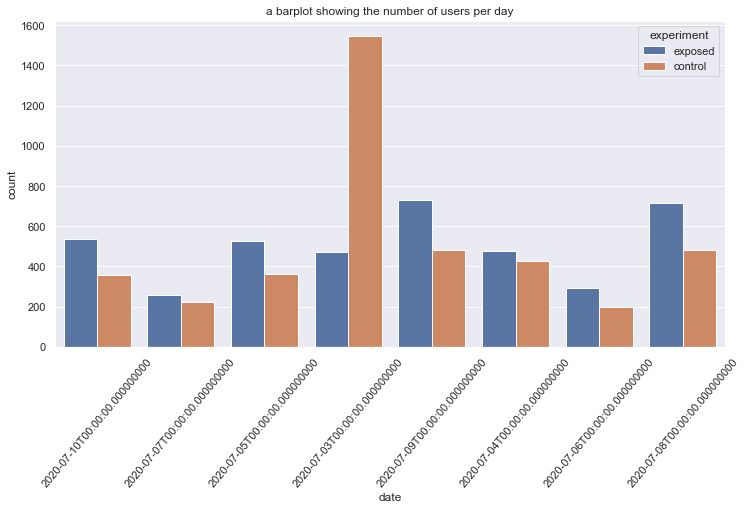

In [16]:
plt.figure(figsize=(12,6))

sns.countplot(data = data,x='date',hue='experiment')
plt.title('a barplot showing the number of users per day')
plt.xticks(rotation=50)

In [14]:
data.groupby('hour').agg({'auction_id':'count'})

,auction_id
hour,
0,194
1,222
2,230
3,266
4,281
5,302
6,327
7,381
8,394


<AxesSubplot:title={'center':'A barplot showing the hour of the day users answered the question'}, xlabel='hour', ylabel='count'>

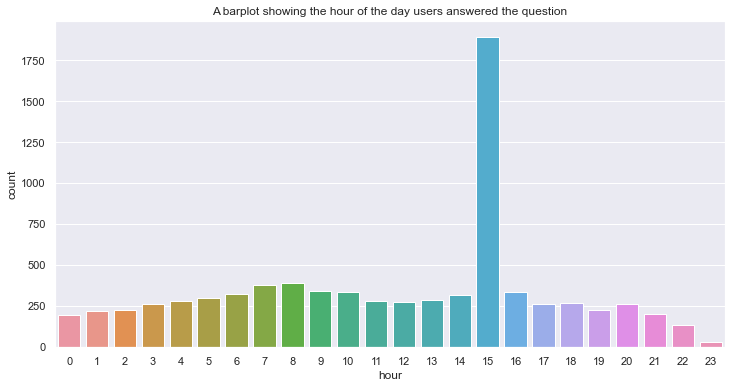

In [17]:

plt.figure(figsize=(12,6))
plt.title('A barplot showing the hour of the day users answered the question')

sns.countplot(data = data, x='hour')

data['experiment'].value_counts()

In [18]:
def column_combine (y,n):
    if(y==1 and n==0 ):
        return "yes"
    elif(y==0 and n==1 ):
        return "no"  
    elif(y==0 and n==0 ):
        return "no answer"

In [ ]:
ans = []
ans2 =[]
for ind in data.index:
    if((data['yes'][ind]) == 1):
        x=1
        x1 = 'yes'
        ans.append(x)
        ans2.append(x1)
    elif((data['no'][ind] == 1)):
        print ('no')
        y=0
        y2 = 'no'
        ans.append(y)
        ans2.append(y2)
    elif(((data['yes'][ind] == 0 )& (data['no'][ind] == 0))):
        print ('none')
        z=2
        z1 = 'no answer'
        ans.append(z)
        ans2.append(z1)

In [20]:

anss = pd.DataFrame(ans)
ans2 = pd.DataFrame(ans2)
#data2 =pd.concat([data,anss],axis=1)
data3 = pd.concat([data,ans2],axis=1)
data3

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,0
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,no answer
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,no answer
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,no answer
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,no answer
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,no answer
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,no answer
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,no answer
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,no answer


In [21]:
data3 = data3.rename(columns={0:'response'})
data3

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,no answer
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,no answer
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,no answer
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,no answer
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,no answer
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,no answer
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,no answer
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,no answer


Text(0.5, 1.0, 'A barplot showing the number of users belonging to the exposed and controll group')

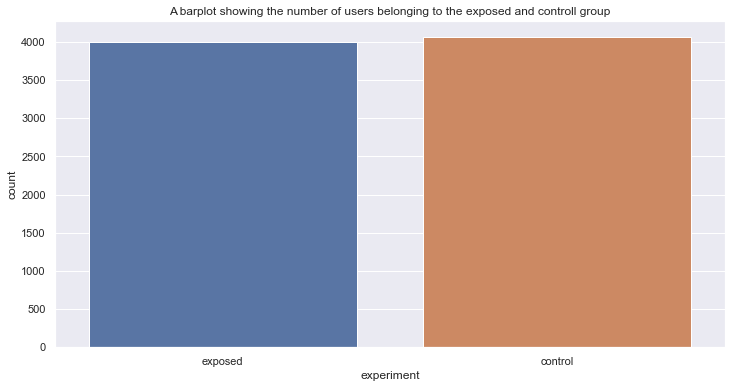

In [22]:

plt.figure(figsize=(12,6))
sns.countplot(data= data3,x='experiment')
plt.title('A barplot showing the number of users belonging to the exposed and controll group')

Text(0.5, 1.0, 'A barplot showing the distribution of how the users answered the question')

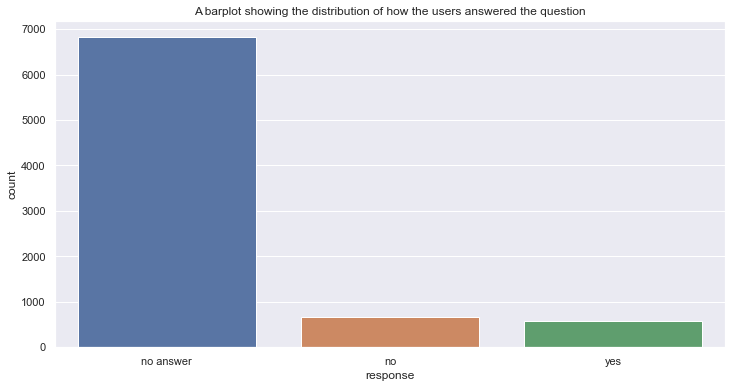

In [23]:
from matplotlib.pyplot import figure, show
from seaborn import countplot

figure(figsize=(12,6))
sns.countplot(data=data3,x='response')

plt.title('A barplot showing the distribution of how the users answered the question')

<AxesSubplot:title={'center':'A barplot showing how users in each group answered the question'}, xlabel='experiment', ylabel='count'>

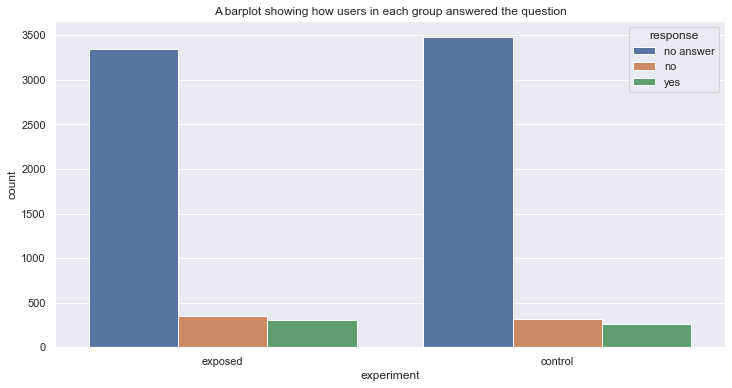

In [24]:
figure(figsize=(12,6))
plt.title('A barplot showing how users in each group answered the question')
sns.countplot(data = data3,x='experiment',hue = 'response')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Chrome Mobile'),
  Text(1, 0, 'Chrome Mobile WebView'),
  Text(2, 0, 'Facebook'),
  Text(3, 0, 'Mobile Safari'),
  Text(4, 0, 'Chrome Mobile iOS'),
  Text(5, 0, 'Samsung Internet'),
  Text(6, 0, 'Mobile Safari UI/WKWebView'),
  Text(7, 0, 'Chrome'),
  Text(8, 0, 'Opera Mini'),
  Text(9, 0, 'Edge Mobile'),
  Text(10, 0, 'Android'),
  Text(11, 0, 'Pinterest'),
  Text(12, 0, 'Opera Mobile'),
  Text(13, 0, 'Firefox Mobile'),
  Text(14, 0, 'Puffin')])

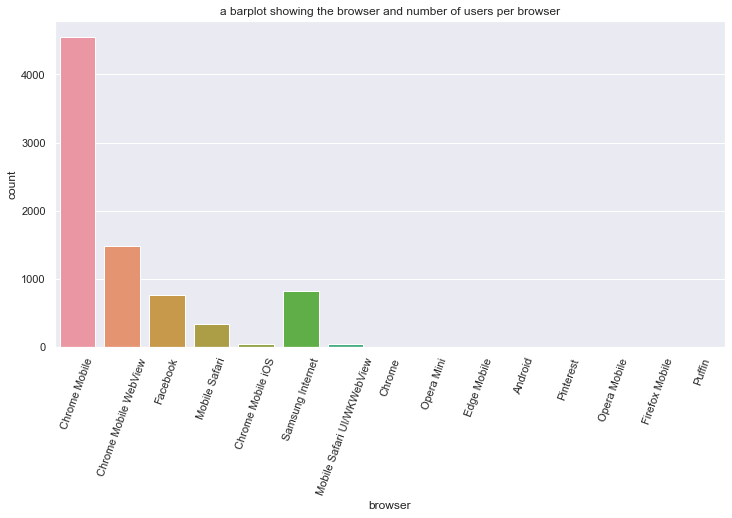

In [25]:
figure(figsize=(12,6))
plt.title('a barplot showing the browser and number of users per browser')

sns.countplot(x='browser',data=data)
plt.xticks(rotation=70)

<AxesSubplot:xlabel='hour', ylabel='count'>

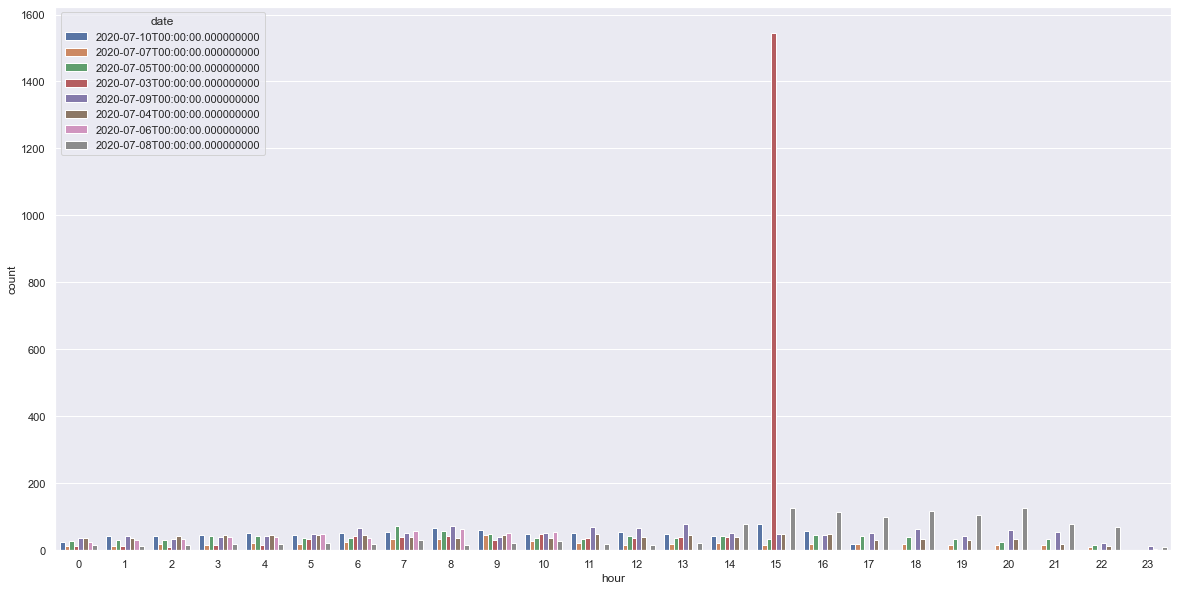

In [26]:

figure(figsize=(20,10))

sns.countplot(data = data, x='hour',hue = 'date')

Task 1.2
Null hypothesis : that there is no difference in brand awareness between the exposed and control groups in the current case
alternative hypothesis : there is a difference in brand awareness 

confidence level : 95%

@ = 0.05&

Groups : Exposed and controled 

The reason we have two groups  is that we want to control for other variables that could have an effect on our results: by having a control group we can directly compare their results to the treatment group(exposed group), because the only systematic difference between the groups is the design of the ads page, and we can therefore attribute any differences in results to the designs.

we check how many times an id appears in our data

In [27]:
session_counts = data['auction_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 0 users that appear multiple times in the dataset


In [28]:
r = data3.drop(['yes','no'], axis=1)
r



,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,no answer
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,no answer
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,no answer
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,no answer
...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,no answer
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,no answer
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,no answer
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,no answer


In [29]:
exposed = data[data['experiment'] == 'exposed']
exposed


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


In [30]:
control = data[data['experiment'] == 'control']
control

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [31]:
exposed1 = len(exposed)
exposed1


4006

In [32]:
controll1 = len(control)
controll1

4071

In [33]:
yes_e,yes_c=len(exposed[exposed['yes'] == 1]),len(control[control['yes'] == 1])
rate_e,rate_c =yes_e/exposed1,yes_c/controll1

Text(0, 0.5, 'Probability')

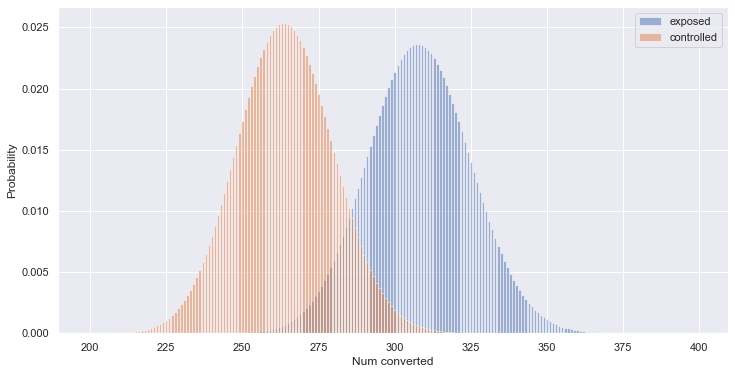

In [34]:
# Determine the probability of having x number of yes
no_of_yes = np.arange(200, 400)
prob_a = binom(exposed1, rate_e).pmf(no_of_yes)
prob_b = binom(controll1, rate_c).pmf(no_of_yes)
# Make the bar plots.
figure(figsize=(12,6))

plt.bar(no_of_yes, prob_a, label="exposed", alpha=0.5)
plt.bar(no_of_yes, prob_b, label="controlled", alpha=0.5)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

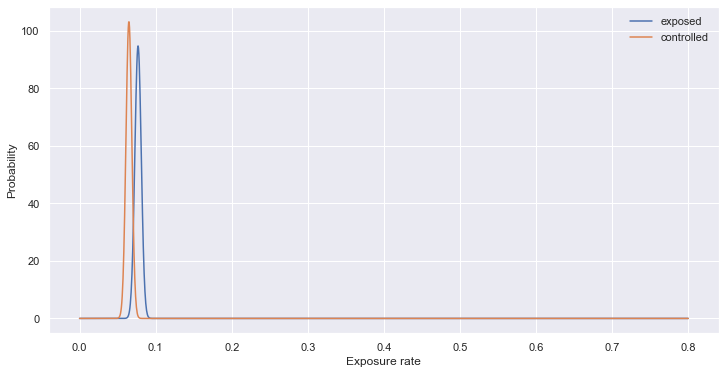

In [35]:

from scipy.stats import norm


std_a = np.sqrt(rate_e* (1 - rate_e) / exposed1)
std_b = np.sqrt(rate_c * (1 - rate_c) / controll1)

click_rate = np.linspace(0, 0.8, 1500)
prob_a = norm(rate_e, std_a).pdf(click_rate)
prob_b = norm(rate_c, std_b).pdf(click_rate)

# Make the bar plots.
figure(figsize=(12,6))

plt.plot(click_rate, prob_a, label="exposed")
plt.plot(click_rate, prob_b, label="controlled")
plt.legend(frameon=False)
plt.xlabel("Exposure rate"); plt.ylabel("Probability")

zscore is 2.108, with p-value 0.018


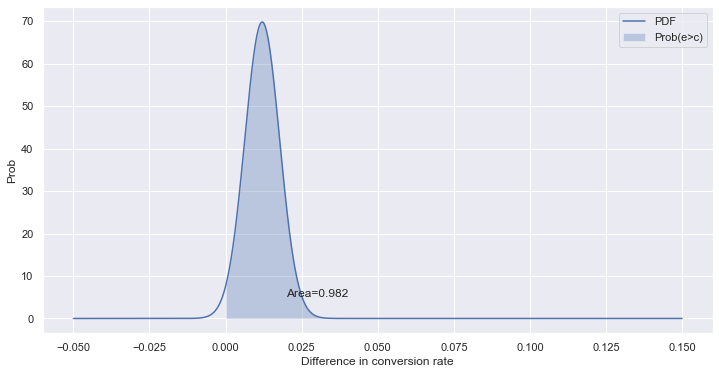

In [36]:
z_score = (rate_e - rate_c) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_e - rate_c, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
figure(figsize=(12,6))

plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(e>c)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob")

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

In [37]:
0.018<0.05

True

In [38]:

def confidence(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.sf(z_score)

print(confidence(yes_c, controll1,yes_e, exposed1 ))

0.017535407972850886


In [39]:
def get_confidence_ab_test(number_exposed,total_exposed,number_controlled,total_controlled):
    rate_exposed = number_exposed/total_exposed
    rate_controlled= number_controlled/total_controlled
    std_exposed =  np.sqrt(rate_exposed * (1 - rate_exposed) / number_exposed)
    std_controlled =  np.sqrt(rate_controlled * (1 - rate_controlled) / number_controlled)
    z_score = (rate_controlled - rate_exposed) / np.sqrt(std_exposed**2 + std_controlled**2)
    return norm.cdf(z_score)

In [40]:
print(get_confidence_ab_test(yes_e, exposed1,yes_c, controll1 ))


0.2873708948658182


CHI- SQUARE 

In [43]:
chi= data.groupby(
    ['experiment']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'yes':  sum,
        # find the number of network type entries
        'no': sum,
        # minimum, first, and number of unique dates
        
    }
)

chi

,yes,no
experiment,,
control,264,322
exposed,308,349


In [46]:
control_yes = chi['yes'][0]
control_no= chi['no'][0]
exposed_yes = chi ['yes'][1]
exposed_no = chi ['no'][1]

In [47]:
T = np.array([[control_yes,control_no],[exposed_yes,exposed_no]])

In [53]:
print(scipy.stats.chi2_contingency(chi,correction = False)[1])

0.518486498219898


FISHER'S